In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_csv("cleaned_dataset.csv")
print("Original rows:", len(df))

# ----- SALARY EXTRACTION (min salary from formats like '55kto80k') -----
def extract_salary(x):
    if pd.isna(x):
        return np.nan
    s = str(x).lower().replace("to", " ").replace("-", " ")
    nums = re.findall(r"(\d+)k", s)
    return int(nums[0]) * 1000 if nums else np.nan

df["Salary_Num"] = df["Salary_Range"].apply(extract_salary)

# ----- EXPERIENCE EXTRACTION -----
def extract_exp_start(x):
    if pd.isna(x):
        return np.nan
    s = str(x).lower().replace("to"," ").replace("-"," ").replace("years"," ").replace("year"," ")
    nums = re.findall(r"\d+", s)
    return int(nums[0]) if nums else np.nan

df["Experience_Start"] = df["Experience"].apply(extract_exp_start)

# ----- DATE CLEANING -----
df["Job_Posting_Date"] = pd.to_datetime(df["Job_Posting_Date"], errors="coerce")

# ----- NUMERIC COLUMNS -----
df["latitude"]     = pd.to_numeric(df["latitude"], errors="coerce")
df["Company_Size"] = pd.to_numeric(df["Company_Size"], errors="coerce")

df.head()


Original rows: 1610462


,Job_Id,Experience,Qualifications,Salary_Range,location,Country,latitude,longitude,Work_Type,Company_Size,...,Role,Job_Portal,Job_Description,Benefits,skills,Responsibilities,Company,Company_Profile,Salary_Num,Experience_Start
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",59000,5
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",56000,2
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",61000,0
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",65000,4
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",64000,1


In [14]:
import re
import numpy as np

def extract_exp_end(x):
    """
    Extracts the END experience value from formats like:
    '0 to 15 Years', '5-10', '3 – 7 years', '10 Years'
    """
    if pd.isna(x):
        return np.nan

    s = str(x).lower()

    # Normalize separators
    s = s.replace("to", " ").replace("-", " ").replace("–", " ").replace("—"," ")
    s = s.replace("years", " ").replace("year", " ")

    # Extract all numbers
    nums = re.findall(r'\d+', s)

    if len(nums) == 0:
        return np.nan
    
    # If only one number exists → return that number as end
    # For example: "10 Years"
    return int(nums[-1])
df["Experience_End"] = df["Experience"].apply(extract_exp_end)


Task 1 rows: 155


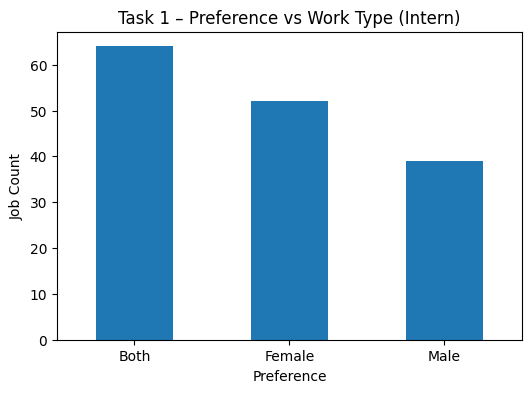

In [22]:
# =========================
# TASK 1
# =========================

t1 = df.copy()

t1 = t1[t1["Work_Type"] == "Intern"]
t1 = t1[t1["latitude"] < 10]
t1 = t1[~t1["Country"].str[0].isin(list("ABCD"))]
t1 = t1[(t1["Job_Title"].str.len() < 10) & (~t1["Job_Title"].str.contains(" "))]
t1 = t1[t1["Company_Size"] < 50000]
t1 = t1[t1["Salary_Num"] > 9000]
t1 = t1[t1["Experience_Start"] % 2 == 0]
t1 = t1[t1["Job_Posting_Date"].dt.month % 2 == 1]

print("Task 1 rows:", len(t1))

if len(t1) > 0:
    t1_plot = t1.groupby("Preference")["Job_Id"].count()
    t1_plot.plot(kind="bar", figsize=(6,4))
    plt.title("Task 1 – Preference vs Work Type (Intern)")
    plt.ylabel("Job Count")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No data for Task 1.")


------ DEBUG FOR TASK 2 ------
Company_Size < 50000  → Remaining rows: 493444
Job_Title == Mechanical Engineer  → Remaining rows: 4254
Experience_End > 5  → Remaining rows: 4254
Country in Asia  → Remaining rows: 380
Country NOT starting with I  → Remaining rows: 313
Salary > 50000  → Remaining rows: 313
Work Type in FT/PT  → Remaining rows: 134
Preference = Male  → Remaining rows: 48
Portal = Idealist  → Remaining rows: 1
Company >=2 vowels  → Remaining rows: 1

Final Task 2 Rows: 1


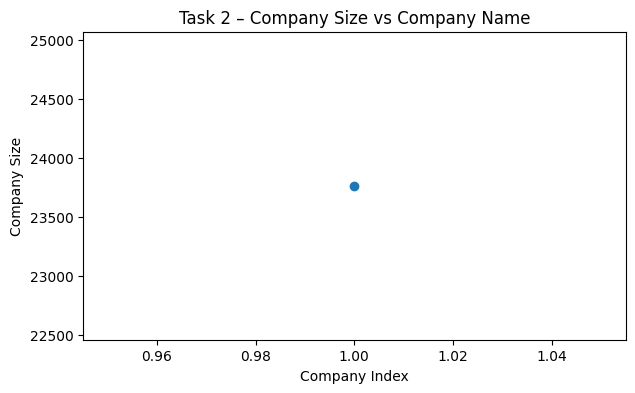

In [19]:
# =========================
# TASK 2 
# =========================

asia = ["India","China","Japan","Pakistan","Nepal","Sri Lanka","Bhutan","Bangladesh","Indonesia","Malaysia",
        "UAE","Saudi Arabia","Iran","Iraq","Turkey","Singapore","Thailand","Vietnam","Myanmar","Afghanistan"]

f = df.copy()

checks = [
    ("Company_Size < 50000", lambda d: d[d["Company_Size"] < 50000]),
    ("Job_Title == Mechanical Engineer", lambda d: d[d["Job_Title"] == "Mechanical Engineer"]),

    # FIXED EXPERIENCE CONDITION
    ("Experience_End > 5", lambda d: d[d["Experience_End"] > 5]),

    ("Country in Asia", lambda d: d[d["Country"].isin(asia)]),
    ("Country NOT starting with I", lambda d: d[~d["Country"].str.startswith("I")]),
    ("Salary > 50000", lambda d: d[d["Salary_Num"] > 50000]),
    ("Work Type in FT/PT", lambda d: d[d["Work_Type"].isin(["Full-Time","Part-Time"])]),
    ("Preference = Male", lambda d: d[d["Preference"] == "Male"]),
    ("Portal = Idealist", lambda d: d[d["Job_Portal"] == "Idealist"]),
    ("Company >=2 vowels", lambda d: d[d["Company"].apply(lambda x: sum(c in "aeiou" for c in str(x).lower()) >= 2)])
]

print("------ DEBUG FOR TASK 2 ------")
for rule_name, rule_fn in checks:
    f_new = rule_fn(f)
    print(rule_name, " → Remaining rows:", len(f_new))
    f = f_new

print("\nFinal Task 2 Rows:", len(f))

# Visualization
if len(f) > 0:
    f = f.reset_index(drop=True)
    f["Index"] = f.index + 1
    plt.figure(figsize=(7,4))
    plt.scatter(f["Index"], f["Company_Size"])
    plt.title("Task 2 – Company Size vs Company Name")
    plt.xlabel("Company Index")
    plt.ylabel("Company Size")
    plt.show()
else:
    print("Task 2 has no rows after filters. Debug above shows the failed filter.")


------ DEBUG FOR TASK 3 (No Additional Rule) ------
Role = Data Engineer  → Remaining rows: 3490
Job_Title = Data Scientist  → Remaining rows: 3490
Exclude Asia  → Remaining rows: 3159
Exclude countries starting with C  → Remaining rows: 2901
Latitude < 10  → Remaining rows: 1025
Preference = Female  → Remaining rows: 347
Qualifications = B.Tech  → Remaining rows: 37
Posting Date 2023 Jan–Jun  → Remaining rows: 6
Portal = LinkedIn  → Remaining rows: 1
Company Size >= 10000  → Remaining rows: 1

Final Task 3 Rows: 1


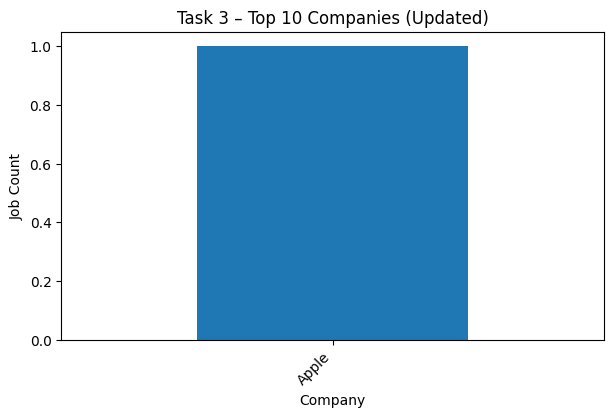

In [20]:
# =========================
# TASK 3
# =========================

f = df.copy()

checks = [
    ("Role = Data Engineer", lambda d: d[d["Role"] == "Data Engineer"]),
    ("Job_Title = Data Scientist", lambda d: d[d["Job_Title"] == "Data Scientist"]),
    ("Exclude Asia", lambda d: d[~d["Country"].isin(asia)]),
    ("Exclude countries starting with C", lambda d: d[~d["Country"].str.startswith("C")]),
    ("Latitude < 10", lambda d: d[d["latitude"] < 10]),
    ("Preference = Female", lambda d: d[d["Preference"] == "Female"]),
    ("Qualifications = B.Tech", lambda d: d[d["Qualifications"] == "B.Tech"]),
    ("Posting Date 2023 Jan–Jun", lambda d: d[
        (d["Job_Posting_Date"] >= "2023-01-01") &
        (d["Job_Posting_Date"] <= "2023-06-01")
    ]),
    ("Portal = LinkedIn", lambda d: d[d["Job_Portal"] == "LinkedIn"]),
    ("Company Size >= 10000", lambda d: d[d["Company_Size"] >= 10000]),
]

print("------ DEBUG FOR TASK 3 (No Additional Rule) ------")
for rule_name, apply_rule in checks:
    f_new = apply_rule(f)
    print(rule_name, " → Remaining rows:", len(f_new))
    f = f_new

print("\nFinal Task 3 Rows:", len(f))

# Visualization
if len(f) > 0:
    top10 = f["Company"].value_counts().head(10)
    plt.figure(figsize=(7,4))
    top10.plot(kind="bar")
    plt.title("Task 3 – Top 10 Companies (Updated)")
    plt.ylabel("Job Count")
    plt.xticks(rotation=45, ha="right")
    plt.show()
else:
    print("Task 3 has no rows after filters. Debug above shows where rows became zero.")


------ DEBUG FOR TASK 4 (All Portals Allowed) ------
Qualifications = B.Tech/M.Tech/PhD  → Remaining rows: 483181
Work Type = Full-Time  → Remaining rows: 96253
Country in Africa  → Remaining rows: 22507
Job Title starts with D  → Remaining rows: 1400
Preference = Male  → Remaining rows: 458
Company Size > 80000  → Remaining rows: 214
Contact Person starts with A  → Remaining rows: 15
Salary > 20000  → Remaining rows: 15

Final Task 4 Rows: 15


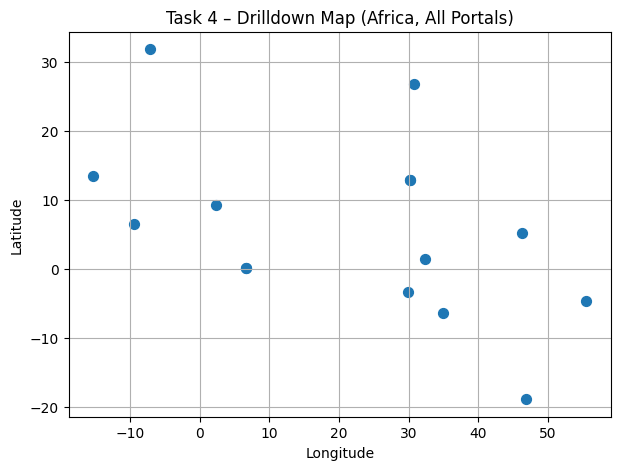

In [21]:
# =========================
# TASK 4 
# =========================

# ----- African countries list -----
africa = [
    "Algeria","Angola","Benin","Botswana","Burkina Faso","Burundi","Cameroon",
    "Cape Verde","Central African Republic","Chad","Comoros","DR Congo","Djibouti",
    "Egypt","Equatorial Guinea","Eritrea","Eswatini","Ethiopia","Gabon","Gambia",
    "Ghana","Guinea","Guinea-Bissau","Ivory Coast","Kenya","Lesotho","Liberia",
    "Libya","Madagascar","Malawi","Mali","Mauritania","Mauritius","Morocco",
    "Mozambique","Namibia","Niger","Nigeria","Republic of the Congo","Rwanda",
    "Sao Tome and Principe","Senegal","Seychelles","Sierra Leone","Somalia",
    "South Africa","South Sudan","Sudan","Tanzania","Togo","Tunisia","Uganda",
    "Zambia","Zimbabwe"
]

f = df.copy()

# ----- DEBUG CHECKS (NO Portal filter) -----
checks = [
    ("Qualifications = B.Tech/M.Tech/PhD", 
     lambda d: d[d["Qualifications"].isin(["B.Tech","M.Tech","PhD"])]),

    ("Work Type = Full-Time", 
     lambda d: d[d["Work_Type"] == "Full-Time"]),

    ("Country in Africa", 
     lambda d: d[d["Country"].isin(africa)]),

    ("Job Title starts with D", 
     lambda d: d[d["Job_Title"].str.startswith("D", na=False)]),

    ("Preference = Male", 
     lambda d: d[d["Preference"] == "Male"]),

    ("Company Size > 80000", 
     lambda d: d[d["Company_Size"] > 80000]),

    ("Contact Person starts with A", 
     lambda d: d[d["Contact_Person"].str.startswith("A", na=False)]),

    # ⛔ Removed portal filter → now all portals allowed

    ("Salary > 20000", 
     lambda d: d[d["Salary_Num"] > 20000]),
]

print("------ DEBUG FOR TASK 4 (All Portals Allowed) ------")
for name, fn in checks:
    new_f = fn(f)
    print(name, " → Remaining rows:", len(new_f))
    f = new_f  # update f

print("\nFinal Task 4 Rows:", len(f))

# ----- Visualization -----
if len(f) > 0:
    plt.figure(figsize=(7,5))
    plt.scatter(f["longitude"], f["latitude"], s=50)
    plt.title("Task 4 – Drilldown Map (Africa, All Portals)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()
else:
    print("\n❌ Task 4 has ZERO rows after filters.")
    print("Check debug output above to find the filter that removed all records.")


Task 5 rows: 1


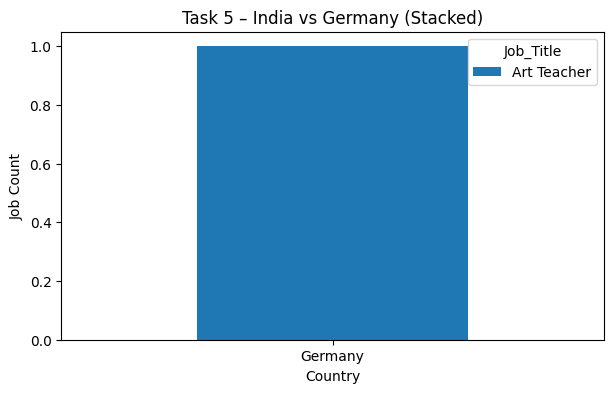

In [7]:
# =========================
# TASK 5
# =========================

t5 = df.copy()

t5 = t5[t5["Qualifications"] == "B.Tech"]
t5 = t5[t5["Work_Type"] == "Full-Time"]
t5 = t5[t5["Experience_Start"] > 2]

t5 = t5[t5["Job_Title"].isin(["Data Scientist","Art Teacher","Aerospace Engineer"])]
t5 = t5[t5["Salary_Num"] > 10000]
t5 = t5[t5["Job_Portal"] == "Indeed"]
t5 = t5[t5["Preference"] == "Female"]
t5 = t5[t5["Job_Posting_Date"] < "2023-08-01"]
t5 = t5[t5["Country"].isin(["India","Germany"])]
t5 = t5[t5["location"].notna() & (t5["location"].str.strip() != "")]
t5 = t5[t5["Company"].str.len() > 8]

print("Task 5 rows:", len(t5))

if len(t5) > 0:
    pivot = (
        t5.groupby(["Country", "Job_Title"])["Job_Id"]
        .count()
        .unstack(fill_value=0)
    )

    pivot.plot(kind="bar", stacked=True, figsize=(7,4))
    plt.title("Task 5 – India vs Germany (Stacked)")
    plt.ylabel("Job Count")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No data for Task 5.")


Task 6 rows: 248


<Figure size 600x400 with 0 Axes>

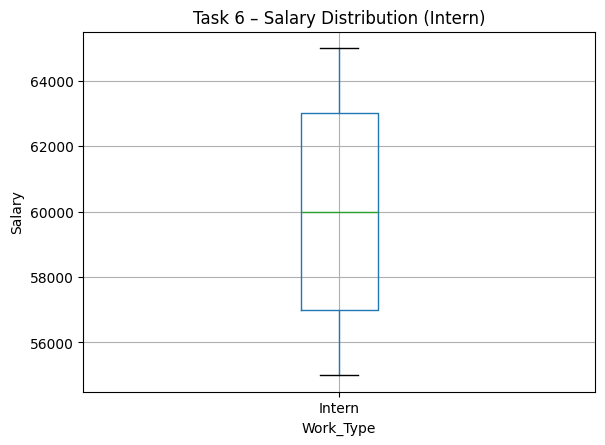

In [8]:
# =========================
# TASK 6 
# =========================

t6 = df.copy()

t6 = t6[t6["Work_Type"] == "Intern"]
t6 = t6[t6["latitude"] < 10]
t6 = t6[~t6["Country"].str[0].isin(list("ABCD"))]
t6 = t6[(t6["Job_Title"].str.len() < 10) & (~t6["Job_Title"].str.contains(" "))]
t6 = t6[t6["Company_Size"] < 50000]
t6 = t6[t6["Salary_Num"] > 8000]
t6 = t6[t6["Experience_Start"] % 2 == 0]
t6 = t6[(t6["Job_Posting_Date"].dt.year >= 2021) & (t6["Job_Posting_Date"].dt.year <= 2023)]
t6 = t6[t6["Contact_Person"].str.contains("e", case=False, na=False)]

print("Task 6 rows:", len(t6))

if len(t6) > 0:
    plt.figure(figsize=(6,4))
    t6.boxplot(column="Salary_Num", by="Work_Type")
    plt.title("Task 6 – Salary Distribution (Intern)")
    plt.suptitle("")
    plt.ylabel("Salary")
    plt.show()
else:
    print("No data for Task 6.")
